In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

diabetes_df = pd.read_csv('diabetes_clean.csv')

# Create feature and target arrays
X = diabetes_df[['bmi','age']].values
y = diabetes_df['diabetes'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 17]
 [31 23]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.57      0.43      0.49        54

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.69      0.68       154



In [81]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.49747733 0.212297   0.45658245 0.24681534 0.42181865 0.55002938
 0.32933931 0.36996703 0.10493489 0.56720734]


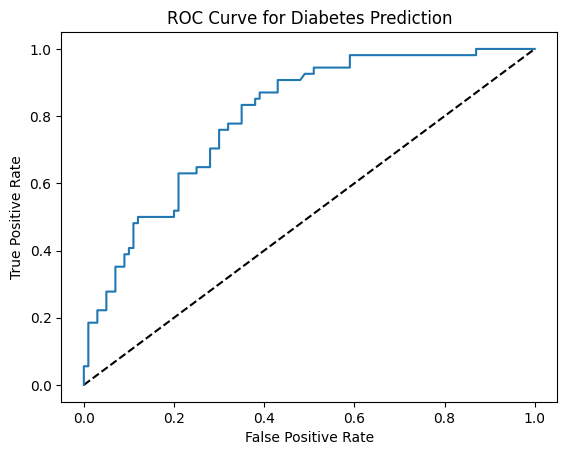

In [82]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### Area under the ROC curve
Evaluating the model

In [83]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7982407407407408
[[83 17]
 [31 23]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.57      0.43      0.49        54

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.69      0.68       154



In [84]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=5)

lasso = Lasso()

# Set up the parameter grid
param_grid = {'alpha': np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.05264105263157895}
Tuned lasso score: 0.09839767988531434


In [94]:
from sklearn.model_selection import RandomizedSearchCV

#Create the parameter space
params = {"penalty": ["l2", "l1"],
          "solver": ["liblinear"],
          "tol": np.linspace(0.0001, 1.0, 50),
          "C": np.linspace(0.1, 1, 50),
          "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.08172448979591837, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.5775510204081633}
Tuned Logistic Regression Best Accuracy Score: 0.6513394642143142
